# Linear Regression Assignment - Bike Sharing #

##  Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
# function to plot barplot for categorical column
def plotCategorical(data , column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=data)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=data, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

In [3]:
# Read the data from csv file

bike_df = pd.read_csv('day.csv')

In [4]:
# Check the head of the dataset
 
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# check the shape of dataframe

bike_df.shape

(730, 16)

In [6]:
# describe the columns of dataframe
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# get the columns information 

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Confirm there are no null values in column data

bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Observations:

1. The dataset has 730 rows and 16 columns
2. The dataset has no null values
3. Data type of all the columns are either int64 or float64 except for 'dteday' column which is of 'object' type


## Step 2: Cleaning Data

In [9]:
# renaming few columns for better readibility

bike_df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

bike_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Column 'Season' conversion to categorical as 'Spring', 'Summer', 'Fall' and 'Winter'.

bike_df.season.replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'},inplace=True)

In [11]:
# Column 'weathersit' conversion to categorical values as 'Pleasant','Moderate', 'Bad', 'Severe'

bike_df.weathersit.replace({1:'Pleasant',2:'Moderate',3:'Bad',4:'Severe'},inplace=True)

In [12]:
# Column 'weekday' conversion to categorical values of days

bike_df.weekday.replace({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'},
                        inplace=True)

In [13]:
# Column 'mnth' conversion to categorical month values

bike_df.month.replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',
                   10:'Oct',11:'Nov',12:'Dec'},inplace=True)

In [14]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [15]:
# Verify whether the changes are applied as expected 

bike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Pleasant,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Pleasant,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Pleasant,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
# check the column info of the dataset

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


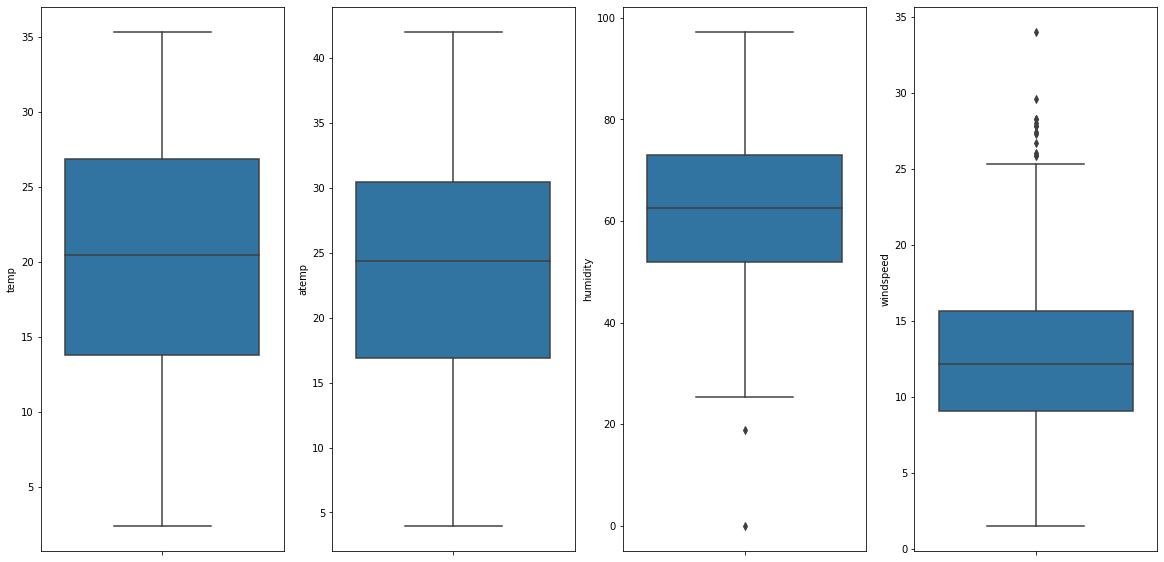

In [17]:
# Checking for the outliers
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
sns.boxplot(y='temp', data=bike_df)
plt.subplot(1,4,2)
sns.boxplot(y='atemp', data=bike_df)
plt.subplot(1,4,3)
sns.boxplot(y='humidity', data=bike_df)
plt.subplot(1,4,4)
sns.boxplot(y='windspeed', data=bike_df)
plt.show()

### Observations:

There are no outliers detected in the dataset

## Step 3: Visualising the Data

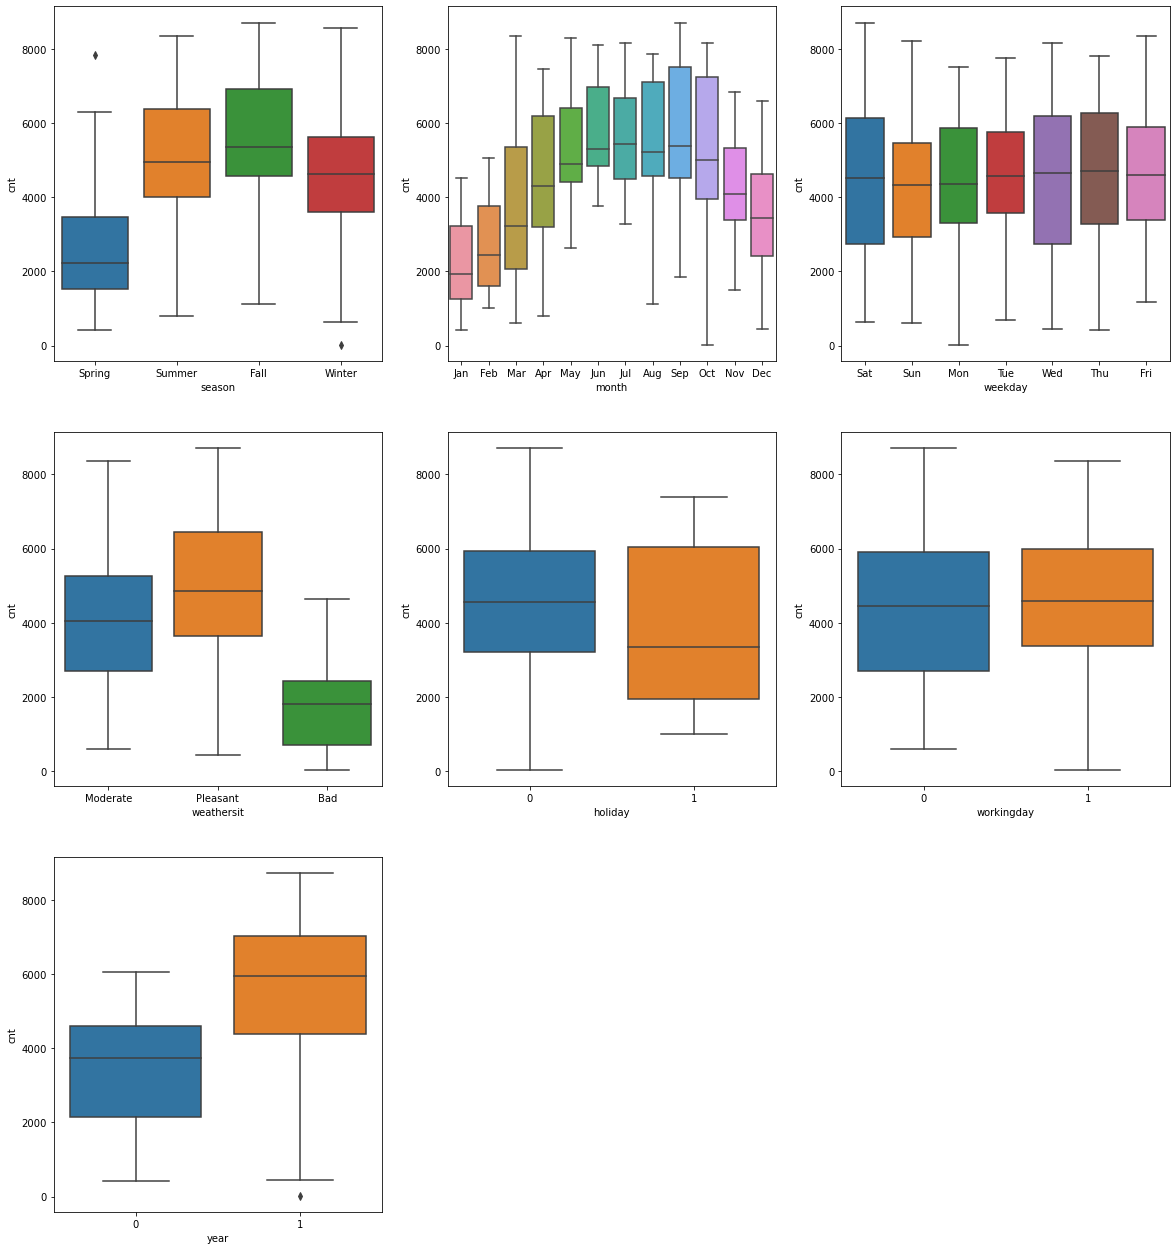

In [18]:
# Analyse the categorical columns to observe 
# how predictor variable stands against the target variable

plt.figure(figsize=(20, 30))
plt.subplot(4,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(4,3,2)
sns.boxplot(x = 'month', y = 'cnt', data = bike_df)
plt.subplot(4,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(4,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(4,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(4,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(4,3,7)
sns.boxplot(x = 'year', y = 'cnt', data = bike_df)
plt.show()

### Observations:

1. 'Spring' has the least bike rentals while 'Fall' has the highest bike rentals
2. Months from 'April' to 'October' have good demand for bike Rentals
3. There is no clarity about the demand for 'weekdays' and 'workingday' since the demand is almost the same for all days of the week.
4. The demand for bike rentals decreases on holidays
5. The demand for bike rentals is good when there is Pleasant and Moderate Weather
6. There is a considerable increase in year on year bike rentals demand from year 2018 to year 2019

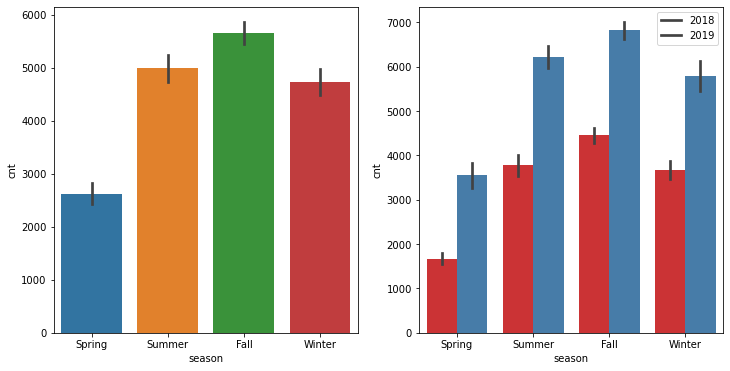

In [19]:
# Analyse bike demand based on seasons

plotCategorical(bike_df, 'season')

### Observations:

1. Fall season has highest bike rentals followed by summer and winter
2. Also for each season the bike rentals has increased dramatically from year 2018 to year 2019
3. This indicates, season can be a good predictor for the dependent variable

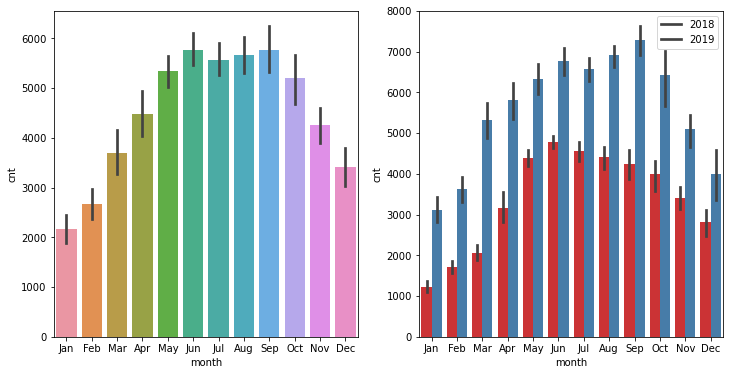

In [20]:
# Analyse bike demand based on month

plotCategorical(bike_df, 'month')

## Observations:

1. The demand for bike rentals increases during the month of April till October
2. For each month the bike rental increased from year 2018 to year 2019
3. It is observed that the demand for bike rentals increases till mid year and then gradually decreases as year end approaches. Similar trend is observed for the year 2019 as well

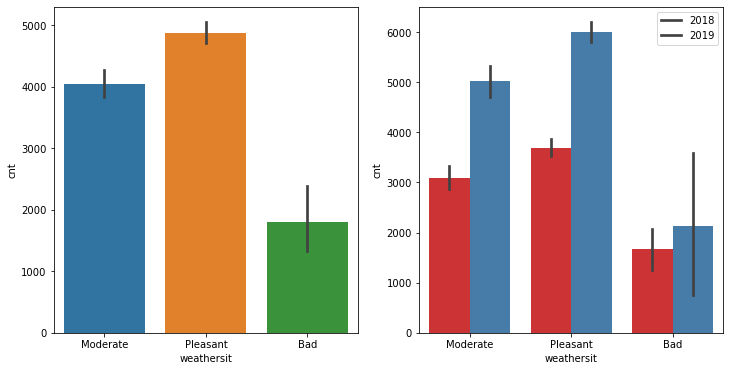

In [21]:
# Analyse bike demand based on weathersit

plotCategorical(bike_df, 'weathersit')

### Observations:

1. As expected the bike rental demand is more in pleasant wheathersit
2. In comparison to the year 2018, the bike rental demand increased for each weather year in 2019

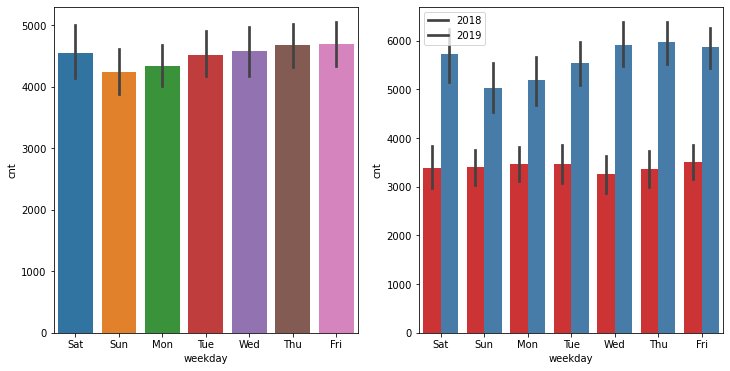

In [22]:
# Analyse bike demand based on weekday

plotCategorical(bike_df, 'weekday')

### Observations:

1. The bike rentals Increase in latter half of the week starting from Thursday till Saturday

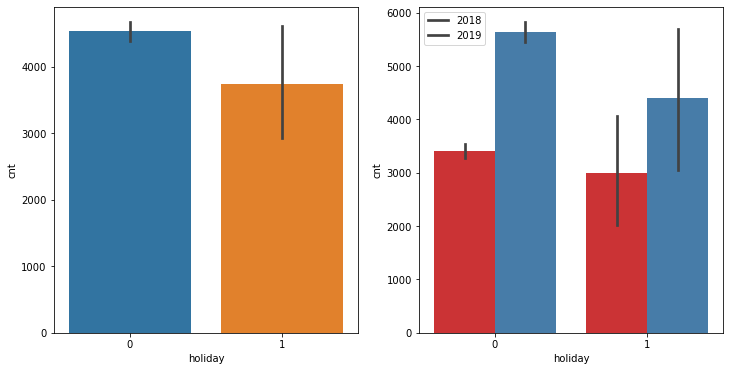

In [23]:
# Analyse bike demand based on holiday

plotCategorical(bike_df, 'holiday')

### Observation:

The demand for bike rentals decreases on holidays.

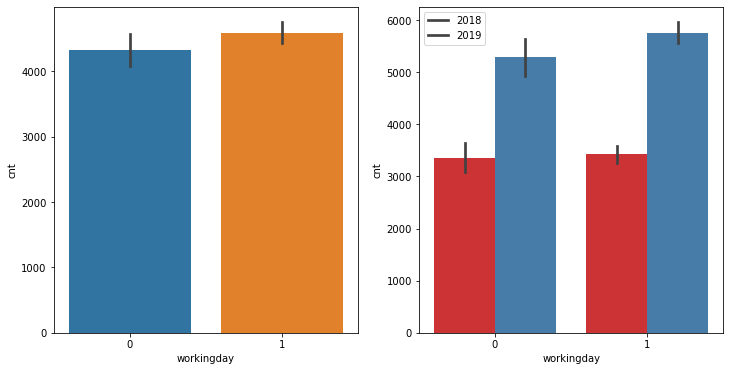

In [24]:
# Analyse bike demand based on workingday

plotCategorical(bike_df, 'workingday')

### Observations

1. The demand for bike rentals remains almost equal either on working days or non-working days
2. The demand however increased from year 2018 to year 2019

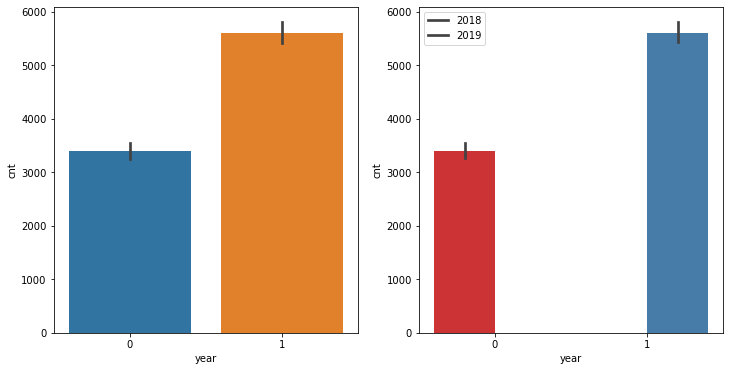

In [25]:
# Analyse bike demand based on year

plotCategorical(bike_df, 'year')


### Observation

The demand for bike rentals increased year over year for 2019

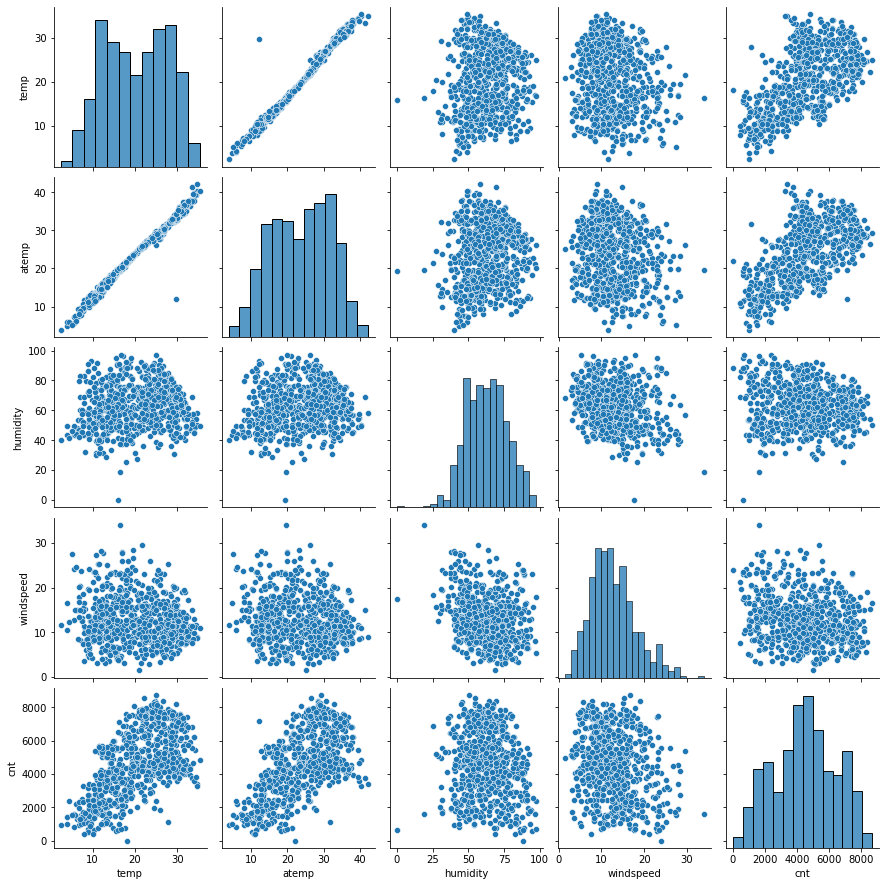

In [26]:
# Analyse/visualise the numerical columns

sns.pairplot(data=bike_df, vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

### Observation:

The Pair-Plot above shows that there is a Linear relation between 'temp','atemp' and 'cnt'

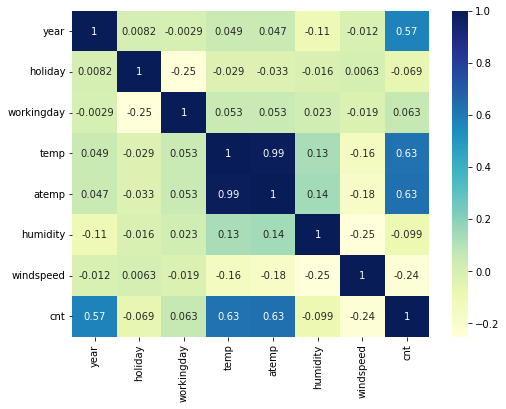

In [27]:
#Calculating Correlation
bike_corr = bike_df.corr()
plt.figure(figsize=(8,6))

#Drawing Heatmap of correlation
sns.heatmap(bike_corr, annot=True, cmap="YlGnBu")
plt.show()

### Observation:

There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

## Step 4: Data Preparation

In [28]:
# Create Dummy variables for month, weekday, weathersit and season variables.

months_df = pd.get_dummies(bike_df.month, drop_first=True)
weekdays_df = pd.get_dummies(bike_df.weekday, drop_first=True)
weathersit_df = pd.get_dummies(bike_df.weathersit, drop_first=True)
seasons_df = pd.get_dummies(bike_df.season, drop_first=True)

In [29]:
bike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Pleasant,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Pleasant,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Pleasant,9.305237,11.46350,43.6957,12.522300,1600


In [30]:
# Merging the dataframe, with the dummy variable dataset. 

bike_df_new = pd.concat([bike_df, months_df, weekdays_df, weathersit_df, seasons_df], axis=1)

In [31]:
bike_df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,Sat,Sun,Thu,Tue,Wed,Moderate,Pleasant,Spring,Summer,Winter
0,Spring,0,Jan,0,Sat,0,Moderate,14.110847,18.18125,80.5833,...,1,0,0,0,0,1,0,1,0,0
1,Spring,0,Jan,0,Sun,0,Moderate,14.902598,17.68695,69.6087,...,0,1,0,0,0,1,0,1,0,0
2,Spring,0,Jan,0,Mon,1,Pleasant,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,1,0,0
3,Spring,0,Jan,0,Tue,1,Pleasant,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,1,1,0,0
4,Spring,0,Jan,0,Wed,1,Pleasant,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,1,1,0,0


In [32]:
bike_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  Aug         730 non-null    uint8  
 13  Dec         730 non-null    uint8  
 14  Feb         730 non-null    uint8  
 15  Jan         730 non-null    uint8  
 16  Jul         730 non-null    uint8  
 17  Jun         730 non-null    uint8  
 18  Mar         730 non-null    uint8  
 19  May         730 non-null    u

In [33]:
# dropping unnecessary columns as we have already created dummy variable out of it.

bike_df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [34]:
# check the head of new dataframe

bike_df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Moderate,Pleasant,Spring,Summer,Winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,1,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,1,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,1,1,0,0


In [35]:
# check the shape of new dataframe

bike_df_new.shape

(730, 30)

## Step 5: Splitting the Data into Training and Testing Sets


In [36]:
# splitting the dataframe into Train and Test

np.random.seed(0)
bike_df_train, bike_df_test = train_test_split(bike_df_new, train_size = 0.7, random_state = 100)

In [37]:
# check the shape of training datatset

bike_df_train.shape

(510, 30)

In [38]:
# check the shape of testing datatset

bike_df_test.shape

(220, 30)

In [39]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [40]:
# Review the head of dataset before scaling.

bike_df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Moderate,Pleasant,Spring,Summer,Winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,1,0,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,1,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,1,0,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,1,0,0,1,0


In [41]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

scaled_num_vars = ['temp','atemp','humidity','windspeed','cnt']
bike_df_train[scaled_num_vars] = scaler.fit_transform(bike_df_train[scaled_num_vars])

In [42]:
# Review the head of dataset after scaling.

bike_df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Moderate,Pleasant,Spring,Summer,Winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,1,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,1,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,1,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,1,0,0,1,0


In [43]:
# describing the train dataset

bike_df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Moderate,Pleasant,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.345098,0.625490,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.475867,0.484471,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


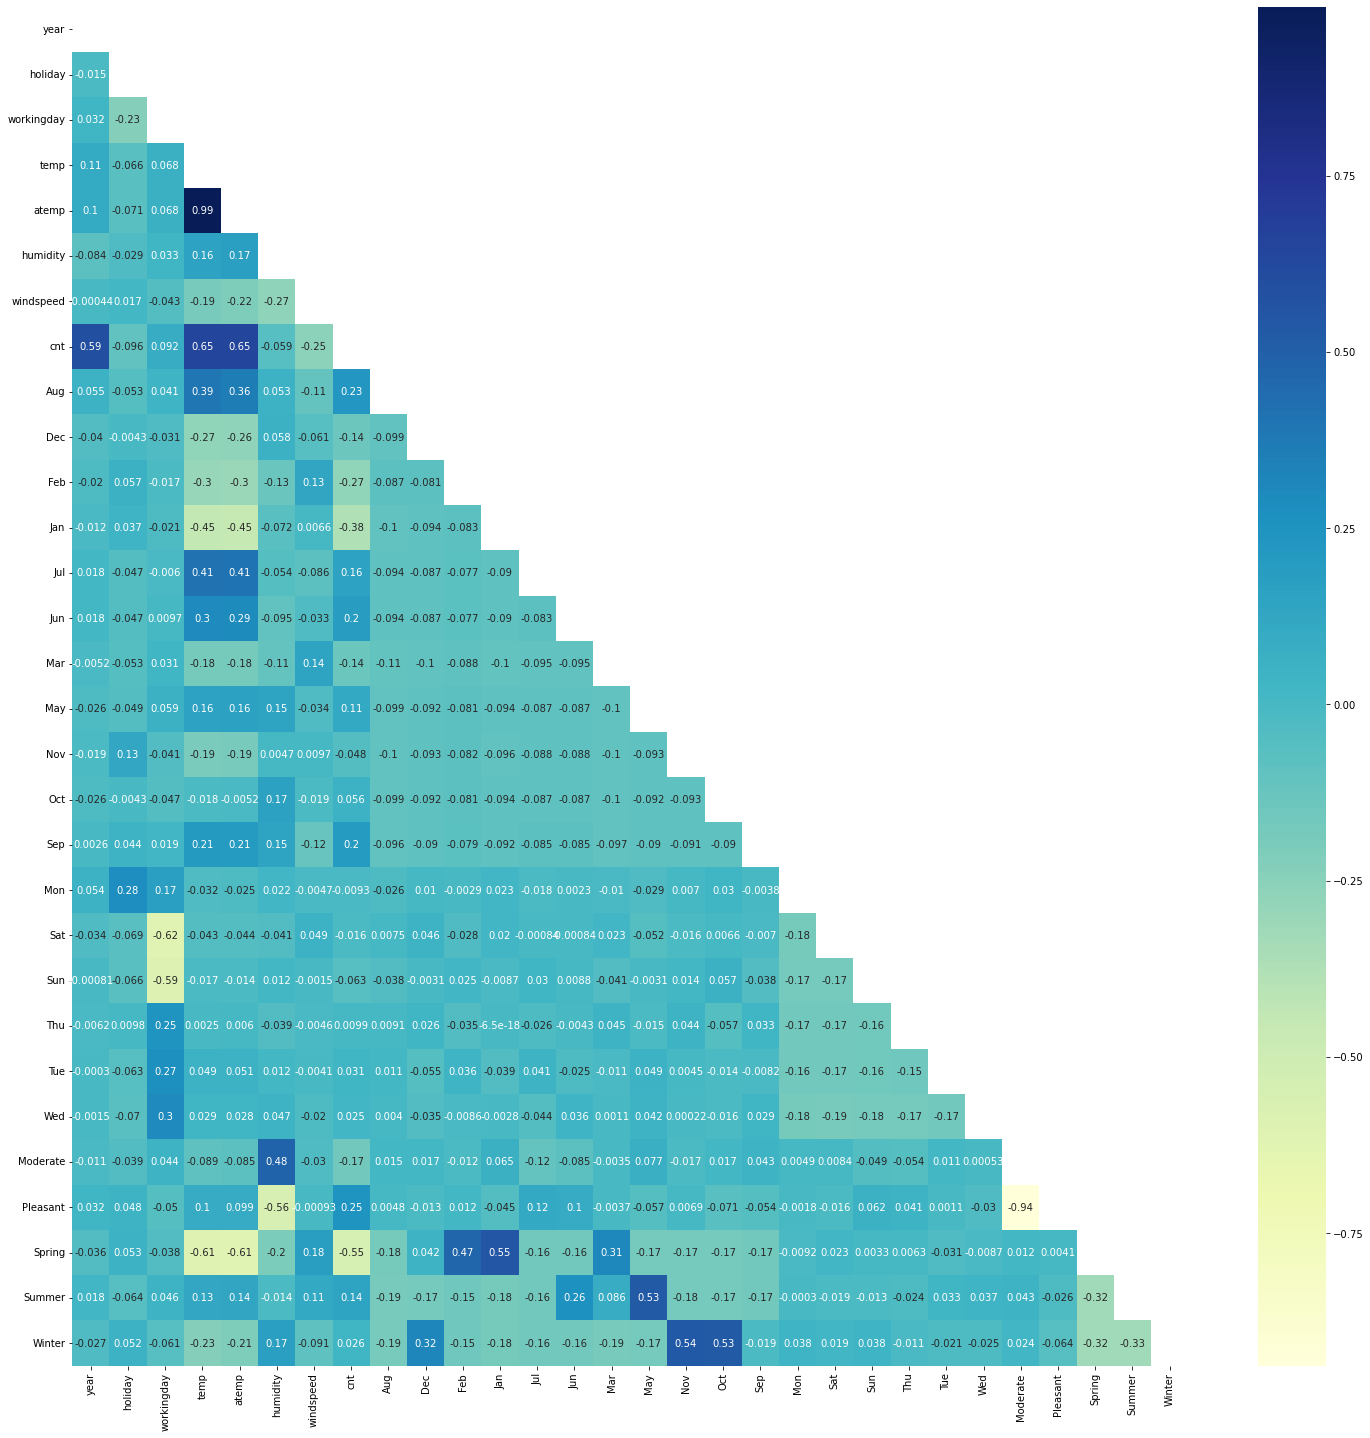

In [44]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(bike_df_train.corr())
sns.heatmap(bike_df_train.corr(), annot = True, cmap="YlGnBu", mask=matrix)
plt.show()

### Observations:

1. cnt have positive correlation with year variable and temp
2. Moderate and humidity show positive correlation
3. Spring season with month of Jan and Feb, Summer season with month of may and Winter season with month of Oct and Nov shows good correlation.

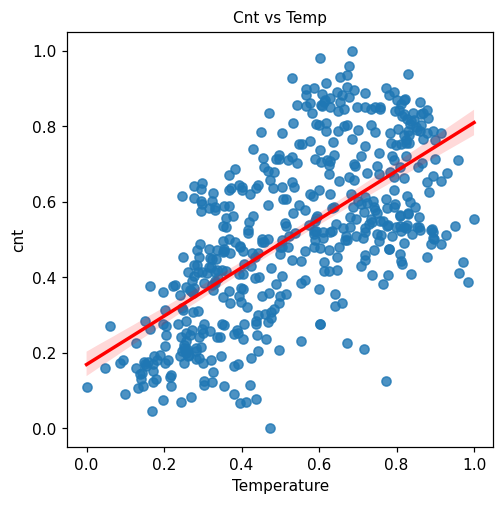

In [45]:
# Checking with regplot the correlation of cnt vs temp
plt.figure(figsize=(5,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=10)
sns.regplot(data=bike_df_train,y="cnt",x="temp",line_kws={"color": "red"})
plt.xlabel("Temperature")
plt.show()

There is a positive linear relation of bike rental demand(cnt) and temp variable.

## Step 6: Building a linear model using RFE

In [46]:
# Building the Linear Model
# Dividing into X and Y sets for the model building

y_train = bike_df_train.pop('cnt')
X_train = bike_df_train

In [47]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=18)
rfe = rfe.fit(X_train, y_train)

In [48]:
#List of variables selected in top 18 list

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 4),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 12),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Mon', False, 6),
 ('Sat', True, 1),
 ('Sun', False, 5),
 ('Thu', False, 8),
 ('Tue', False, 7),
 ('Wed', False, 9),
 ('Moderate', True, 1),
 ('Pleasant', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [49]:
# Select the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'Dec',
       'Feb', 'Jan', 'Jul', 'Nov', 'Sep', 'Sat', 'Moderate', 'Pleasant',
       'Spring', 'Summer', 'Winter'],
      dtype='object')


In [50]:
# Review the rejected columns

X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Jun', 'Mar', 'May', 'Oct', 'Mon', 'Sun', 'Thu', 'Tue',
       'Wed'],
      dtype='object')

In [51]:
# Create X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [52]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [53]:
# VIF Check

calculateVIF(X_train_rfe)

,Features,VIF
4,humidity,27.09
3,temp,26.99
14,Pleasant,16.28
13,Moderate,9.57
15,Spring,6.59
2,workingday,5.45
5,windspeed,4.73
17,Winter,4.55
16,Summer,3.35
8,Jan,2.52


### Observation:

'humidity' shows high VIF value.

#### MODEL 1

In [54]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train,X_train_lm_1).fit()

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Sat, 08 Oct 2022   Prob (F-statistic):          9.80e-190
Time:                        20:45:28   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0300      0.049      0.615      0.5

Removing the variable 'humidity' based on its High VIF value

In [55]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
13,Pleasant,16.23
3,temp,15.68
12,Moderate,9.22
14,Spring,5.58
2,workingday,5.40
4,windspeed,4.71
16,Winter,3.42
15,Summer,2.84
7,Jan,2.39
0,year,2.08


#### MODEL 2

In [56]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)

lr_2 = sm.OLS(y_train,X_train_lm_2).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.4
Date:                Sat, 08 Oct 2022   Prob (F-statistic):          1.63e-187
Time:                        20:45:28   Log-Likelihood:                 516.47
No. Observations:                 510   AIC:                            -996.9
Df Residuals:                     492   BIC:                            -920.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0813      0.040     -2.009      0.0

Removing the variable 'Pleasant' based on its Very High 'VIF' value.

In [57]:
# As Pleasant shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['Pleasant'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.29
2,workingday,5.33
4,windspeed,4.67
13,Spring,4.55
15,Winter,3.03
14,Summer,2.34
7,Jan,2.24
0,year,2.07
11,Sat,1.99
6,Feb,1.89


#### MODEL 3

In [58]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)

lr_3 = sm.OLS(y_train,X_train_lm_3).fit()

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     122.4
Date:                Sat, 08 Oct 2022   Prob (F-statistic):          5.48e-160
Time:                        20:45:28   Log-Likelihood:                 447.82
No. Observations:                 510   AIC:                            -861.6
Df Residuals:                     493   BIC:                            -789.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1941      0.039      5.027      0.0

Removing the variable 'Feb' based on its High p-value.

In [59]:
# As Feb shows high p-value hence we can drop it
X_train_new = X_train_new.drop(['Feb'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.20
2,workingday,5.31
4,windspeed,4.67
12,Spring,3.17
14,Winter,2.99
13,Summer,2.34
0,year,2.07
10,Sat,1.99
8,Nov,1.82
6,Jan,1.68


#### MODEL 4

In [60]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)

lr_4 = sm.OLS(y_train,X_train_lm_4).fit()

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     130.3
Date:                Sat, 08 Oct 2022   Prob (F-statistic):          1.01e-160
Time:                        20:45:28   Log-Likelihood:                 447.03
No. Observations:                 510   AIC:                            -862.1
Df Residuals:                     494   BIC:                            -794.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1831      0.038      4.870      0.0

Removing the variable 'Nov' based on its High p-value.

In [61]:
# As Nov shows high p-value hence we can drop it
X_train_new = X_train_new.drop(['Nov'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.11
2,workingday,5.27
4,windspeed,4.63
11,Spring,3.17
12,Summer,2.34
13,Winter,2.18
0,year,2.07
9,Sat,1.98
6,Jan,1.67
7,Jul,1.59


#### MODEL 5

In [62]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)

lr_5 = sm.OLS(y_train,X_train_lm_5).fit()

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.5
Date:                Sat, 08 Oct 2022   Prob (F-statistic):          1.46e-161
Time:                        20:45:28   Log-Likelihood:                 446.45
No. Observations:                 510   AIC:                            -862.9
Df Residuals:                     495   BIC:                            -799.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1738      0.037      4.754      0.0

Removing the variable 'Dec' based on its High p-value.

In [63]:
# As Jan shows high p-value hence we can drop it
X_train_new = X_train_new.drop(['Dec'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.06
2,workingday,5.22
4,windspeed,4.62
10,Spring,3.07
11,Summer,2.34
0,year,2.07
8,Sat,1.96
12,Winter,1.96
5,Jan,1.62
6,Jul,1.59


#### MODEL 6

In [64]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)

lr_6 = sm.OLS(y_train,X_train_lm_6).fit()

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.1
Date:                Sat, 08 Oct 2022   Prob (F-statistic):          2.07e-162
Time:                        20:45:28   Log-Likelihood:                 445.86
No. Observations:                 510   AIC:                            -863.7
Df Residuals:                     496   BIC:                            -804.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1652      0.036      4.630      0.0

Removing the variable 'holiday' based on its High p-value.

In [65]:
# As holiday shows high p-value hence we can drop it
X_train_new = X_train_new.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.81
1,workingday,4.66
3,windspeed,4.61
9,Spring,2.99
10,Summer,2.33
0,year,2.07
11,Winter,1.90
7,Sat,1.83
4,Jan,1.62
5,Jul,1.59


#### MODEL 7

In [66]:
# Building 7th linear regression model

X_train_lm_7 = sm.add_constant(X_train_new)

lr_7 = sm.OLS(y_train,X_train_lm_7).fit()

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     161.9
Date:                Sat, 08 Oct 2022   Prob (F-statistic):          5.27e-163
Time:                        20:45:28   Log-Likelihood:                 444.62
No. Observations:                 510   AIC:                            -863.2
Df Residuals:                     497   BIC:                            -808.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1584      0.035      4.467      0.0

Removing the variable 'Jan' based on its High p-value.

In [67]:
# As Jan shows high p-value hence we can drop it
X_train_new = X_train_new.drop(['Jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.72
1,workingday,4.63
3,windspeed,4.59
8,Spring,2.38
9,Summer,2.32
0,year,2.06
10,Winter,1.90
6,Sat,1.82
4,Jul,1.58
7,Moderate,1.54


#### MODEL 8

In [68]:
# Building 8th linear regression model

X_train_lm_8 = sm.add_constant(X_train_new)

lr_8 = sm.OLS(y_train,X_train_lm_8).fit()

print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     175.6
Date:                Sat, 08 Oct 2022   Prob (F-statistic):          1.73e-163
Time:                        20:45:28   Log-Likelihood:                 443.08
No. Observations:                 510   AIC:                            -862.2
Df Residuals:                     498   BIC:                            -811.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1440      0.035      4.169      0.0

Removing the variable 'Jul' based on its High p-value.

In [69]:
# As Jan shows high p-value hence we can drop it
X_train_new = X_train_new.drop(['Jul'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.47
1,workingday,4.63
3,windspeed,4.58
7,Spring,2.29
0,year,2.06
8,Summer,2.00
5,Sat,1.82
9,Winter,1.74
6,Moderate,1.54
4,Sep,1.22


#### MODEL 9

In [70]:
# Building 9th linear regression model

X_train_lm_9 = sm.add_constant(X_train_new)

lr_9 = sm.OLS(y_train,X_train_lm_9).fit()

print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     190.6
Date:                Sat, 08 Oct 2022   Prob (F-statistic):          2.59e-163
Time:                        20:45:28   Log-Likelihood:                 439.93
No. Observations:                 510   AIC:                            -857.9
Df Residuals:                     499   BIC:                            -811.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1348      0.035      3.903      0.0

Removing the variable 'Spring' based on its High p-value.

In [71]:
# As Spring shows high p-value hence we can drop it
X_train_new = X_train_new.drop(['Spring'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.76
1,workingday,4.02
3,windspeed,3.40
0,year,2.01
5,Sat,1.68
7,Summer,1.57
6,Moderate,1.50
8,Winter,1.38
4,Sep,1.20


#### MODEL 10

In [72]:
# Building 10th linear regression model

X_train_lm_10 = sm.add_constant(X_train_new)

lr_10 = sm.OLS(y_train,X_train_lm_10).fit()

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     210.0
Date:                Sat, 08 Oct 2022   Prob (F-statistic):          1.38e-163
Time:                        20:45:28   Log-Likelihood:                 437.81
No. Observations:                 510   AIC:                            -855.6
Df Residuals:                     500   BIC:                            -813.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0786      0.021      3.751      0.0

### Observations:

1. VIF is acceptable and p-value for all the features is 0.0
2. R2 is 0.791
3. The difference between R-square and Adjusted R-square is 0.003 which shows that no further variables are required to be removed from this model.

We will go with this model as our final model since it has all important statistics like high (R-square, Adjusted R-squared and F-statistic). This model shows no insignificant variables and no multicollinearty (high VIF) variables. 

## Step 7. Model Evaluation

### Residual Analysis

In [73]:
X_train_lm_10

,const,year,workingday,temp,windspeed,Sep,Sat,Moderate,Summer,Winter
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,1,1,0
111,1.0,0,1,0.345824,0.380981,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,1,0,1
79,1.0,0,1,0.462664,0.529881,0,0,1,1,0


In [74]:
y_train_pred = lr_10.predict(X_train_lm_10)

Text(0.5, 0, 'Errors')

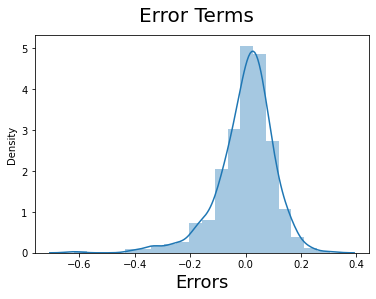

In [75]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

### Observations:

From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

 ### Multi Colinearity

In [76]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.76
1,workingday,4.02
3,windspeed,3.40
0,year,2.01
5,Sat,1.68
7,Summer,1.57
6,Moderate,1.50
8,Winter,1.38
4,Sep,1.20


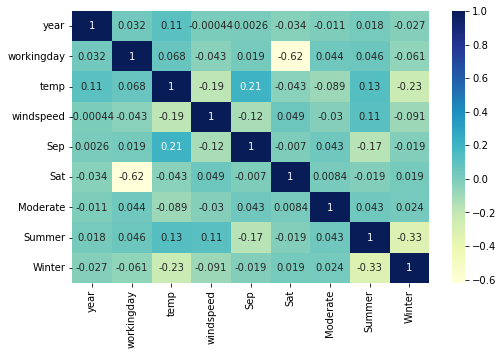

In [77]:
plt.figure(figsize=(8,5))
sns.heatmap(X_train_new.corr(),annot = True, cmap="YlGnBu")
plt.show()

### Observations:

1. From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5
2. There is no multicolinearity as observed from the heatmap as well

### Linearity

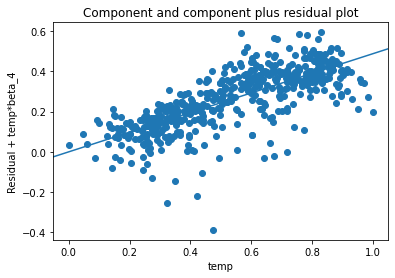

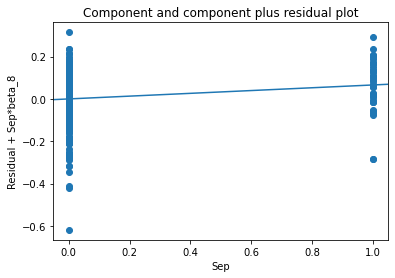

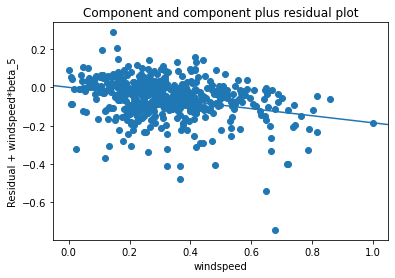

In [78]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'Sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

### Observation:

Linearity can be observed from above visualizations.

### Homoscedasticity

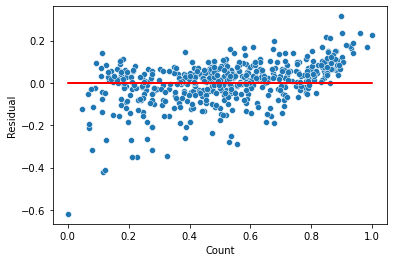

In [79]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### Observation 

No visible pattern observed from above plot for residuals.


### Independence of residuals


Durbin-Watson value of final model lr_10 is 2.067, which signifies there is no autocorrelation.

### Step 8: Making Predictions Using the Final Model

In [80]:
# Applying scaling on the test dataset

scaled_num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
bike_df_test[scaled_num_vars] = scaler.transform(bike_df_test[scaled_num_vars])
bike_df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Moderate,Pleasant,Spring,Summer,Winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,1,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,1,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,1,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,1,0,1,0


In [81]:
bike_df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Moderate,Pleasant,Spring,Summer,Winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.318182,0.654545,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.466833,0.476601,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
y_test = bike_df_test.pop('cnt')
X_test = bike_df_test

In [83]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_lm_10 = sm.add_constant(X_test_new)

In [84]:
# Making predictions
y_pred = lr_10.predict(X_test_lm_10)

In [85]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7692

## Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

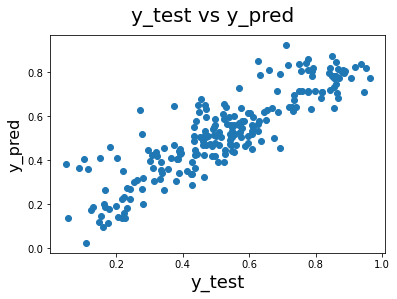

In [86]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [87]:
round(lr_10.params,4)

const         0.0786
year          0.2388
workingday    0.0479
temp          0.5514
windspeed    -0.1838
Sep           0.0876
Sat           0.0591
Moderate     -0.0663
Summer        0.0886
Winter        0.1161
dtype: float64

The equation of our best fitted line is:

$ cnt = 0.0786 + 0.2388  \times  year + 0.0479  \times  workingday + 0.5514 \times temp - 0.1838 \times windspeed + 0.0876 \times Sep + 0.0591 \times Sat - 0.0663 \times Moderate + 0.0886 \times Summer + 0.1161 \times Winter $

In [88]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.734


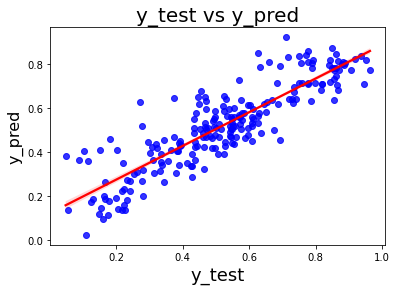

In [89]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## Comparision between Training and Testing dataset:


- Train R^2 : 0.791
- Train Adjusted R^2 : 0.787
- Test R^2 : 0.769
- Test Adjusted R^2 : 0.734
- This seems to be a really good model that can very well 'Generalize' various datasets.


## Final Report

As per the final Model, the top 3 predictor variables that influences the bike booking are:

- Temperature (temp) - A coefficient value of ‘5514’ indicated that a unit increase in temp variable increases the bike hire numbers by 5514 units.

- Year (year) - A coefficient value of ‘0.2388’ indicated that a unit increase in year variable increases the bike hire numbers by 0.2388 units.

- Wind Speed (windspeed) - A coefficient value of ‘-0.1838’ indicated that, w.r.t windspeed, a unit increase in windspeed variable decreases the bike hire numbers by 0.1838 units.
